# Marking Attendance using Face Recognition 
In this project we will use python's face_recognition module to recognise faces and then add them into attendance sheet which will be a csv file.

### So let's get started

### Import all the needed modlues

In [44]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime
import matplotlib.pyplot as plt 
%matplotlib inline

In [45]:
# Define a path to access all the images
path="Students Images"

In [46]:
my_student_list=os.listdir(path)

In [47]:
print(my_student_list)

['Bill Gates.jpg', 'Elon Musk.jpg', 'Hritik Roshan.jpg', 'Mark Zukerberg.jpg', 'Steve Jobs.jpg']


### Create a function which will mark attendance and add it to the csv file with time

In [48]:
def mark_attendance(name):
    with open("attendance.csv","r+") as f:
        my_data_list=f.readlines()
        namelist=[]
        for line in my_data_list:
            entry=line.split(',')
            namelist.append(entry[0])
        if name not in namelist:
            now=datetime.now()
            dtstring=now.strftime('%H %M %S')
            f.writelines(f"\n{name},{dtstring}")
              
        

### Now let's add all the images in a list and add all the student names inside an another list

In [49]:
stu_images=[]
stu_names=[]

In [50]:
for stu in my_student_list:
    image=cv2.imread(f"{path}/{stu}")
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    stu_images.append(image)
    stu_names.append(os.path.splitext(stu)[0])

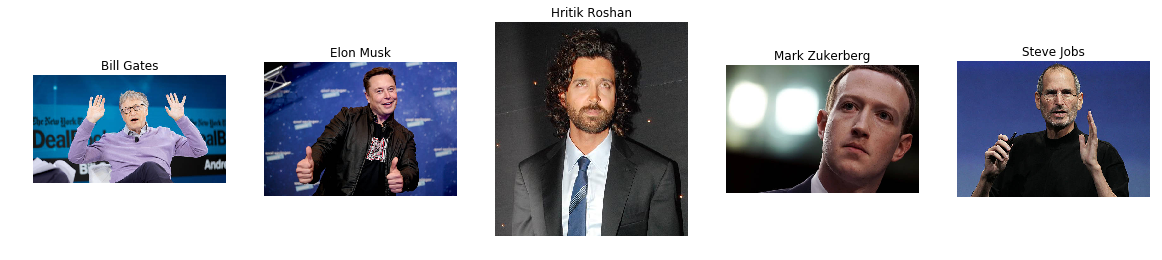

In [51]:
plt.figure(figsize=(20,20))
for i in range(len(stu_names)):
    ax=plt.subplot(1,5,i+1);
    plt.title(stu_names[i])
    plt.axis('off')
    plt.imshow(stu_images[i]);
    
    

### Let's make a function which will find encoding of the images and store them 

In [52]:
def find_encodings(images):
    encode_list=[]
    for image in images:
        encode=face_recognition.face_encodings(image)[0]
        encode_list.append(encode)
        
    return encode_list
        

In [53]:
encode_stu=find_encodings(stu_images)

### Let's enable our webcam and capture the face's image to recognize them

In [54]:
cap=cv2.VideoCapture(0)

while True:
    success,img=cap.read()
    
    # Reshape the image size 
    imgs=cv2.resize(img,(0,0),None,0.25,0.25)
    
    # Change it's color channel
    imgs=cv2.cvtColor(imgs,cv2.COLOR_BGR2RGB)
    
    # Now let's locate the location of the face in the current frame
    face_cur_loc=face_recognition.face_locations(imgs)
    
    # Now let's encode the faces in the web cam 
    encode_cam=face_recognition.face_encodings(imgs,face_cur_loc)
    
    # now compare these face encodings
    for encode_face, face_loc in zip(encode_cam,face_cur_loc):
        matches=face_recognition.compare_faces(encode_stu,encode_face)
        facedis=face_recognition.face_distance(encode_stu,encode_face)
        match_index=np.argmin(facedis)
        
        if matches[match_index]:
            name=stu_names[match_index].upper()
            y1,x2,y2,x1=face_loc
            x1=4*x1
            x2=4*x2
            y1=4*y1
            y2=4*y2
            
            # Draw rectangle around the faces and show names
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.rectangle(img,(x1,y2+35),(x2,y2),(0,255,0),cv2.FILLED)
            cv2.putText(img,name,(x1-2,y2+25),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
            mark_attendance(name)
            
            
    cv2.imshow("webcam",img)
    k=cv2.waitKey(1) & 0xFF
    if k==27:
        break

cap.release()
cv2.destroyAllWindows()
    
     
    
    

['Name,Time\n']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40\n', 'BILL GATES,14 10 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40\n', 'BILL GATES,14 10 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40\n', 'BILL GATES,14 10 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40\n', 'BILL GATES,14 10 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40\n', 'BILL GATES,14 10 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40\n', 'BILL GATES,14 10 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40\n', 'BILL GATES,14 10 40']
['Name,Time\n', '\n', 'ELON MUSK,14 08 40\n', 'BILL GATES,14 10 40']
['Name,Time\n', '\n', 'ELON MUSK,14 